[1317]
[439.]
[439.]


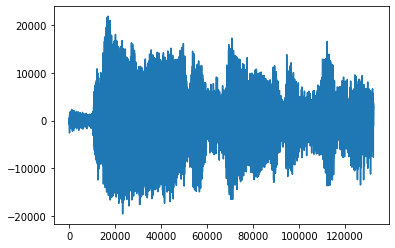

In [7]:
import numpy as np
from scipy.io import wavfile
from numpy import fft
import matplotlib.pyplot as plt

sample_rate,sig_cor=wavfile.read(r'F:\lecture document\ECE 4250 signal\Corcovado.wav')
sig_cor=np.array(sig_cor,dtype=np.float32)
sig_cor=sig_cor[:,1]
a=sample_rate*122
b=sample_rate*125
sig_clip=sig_cor[a:b]

fft_clip=np.fft.fft(sig_clip)
#plt.plot(fft_clip.real)
  #DC component is on the fft_clip[0] 

ffts_clip=np.fft.fftshift(fft_clip)  #After fftshift DC component is in the middle






fft_clip1=fft_clip[0:int(len(fft_clip)*0.5)]
ind=np.where(fft_clip1== max(fft_clip1))
print(ind[0])
freq=np.fft.fftfreq(fft_clip.size,1/sample_rate) #find the frequency by fftfreq
print(freq[ind[0]])

freq_1=ind[0]/len(fft_clip)*sample_rate  #find the frequency by calculation
print(freq_1)


import pyaudio 

p = pyaudio.PyAudio()

volume = 0.5     # range [0.0, 1.0]
fs = sample_rate       # sampling rate, Hz, must be integer
duration = 3.0   # in seconds, may be float
f = 439.0        # sine frequency, Hz, may be float

# generate samples, note conversion to float32 array
samples = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)

# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
               channels=1,
                rate=fs,
                output=True)

# play. May repeat with different volume values (if done interactively) 
stream.write(volume*samples)

stream.stop_stream()   
stream.close()
p.terminate() 



p = pyaudio.PyAudio()

volume = 0.5     # range [0.0, 1.0]
fs = sample_rate       # sampling rate, Hz, must be integer
duration = 3.0   # in seconds, may be float
f = 439.0        # sine frequency, Hz, may be float

# generate samples, note conversion to float32 array
sig = sig_clip
plt.plot(sig)
# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
               channels=1,
                rate=fs,
                output=True)

# play. May repeat with different volume values (if done interactively) 
stream.write(volume*sig)

stream.stop_stream()   
stream.close()
p.terminate() 

